# UNIVERSIDAD DEL AZUAY
## Facultad de CCTT
## Inteligencia Artificial

### Gustavo R. Robalino

## Empezamos importando las bibliotecas que vamos a necesitar.

In [1]:
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt

## Vamos a utilizar NumPy para las operaciones con matrices y Matplotlib para generar algunas gráficas. Para mostrar las gráficas en el notebook Jupyter se importa también la función display

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

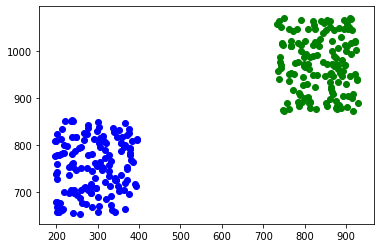

In [21]:
n = 300 # 50 muestras aleatorias
# generamos dos centros para las dos clases de puntos para entrenamiento 
c1 = [random.randint(0,1000), random.randint(0,1000)]
c2 = [random.randint(0,1000), random.randint(0,1000)]
# generamos las muestras aleatorias alrededor de los centros
tuplasC1 = []
tuplasC2 = []
labelsC1 = []
labelsC2 = []
for i in range(int(n/2)):
    tuplasC1.append([c1[0] + random.randint(-100,100), c1[1] + random.randint(-100,100)])
    labelsC1.append(0)
    tuplasC2.append([c2[0] + random.randint(-100,100), c2[1] + random.randint(-100,100)])
    labelsC2.append(1)

labels = labelsC1 + labelsC2
puntos = np.matrix(tuplasC1 + tuplasC2)
# dibujamos los puntos
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
display(plt)

## En machine learning tan importante como el algoritmo que hayamos decidido usar son los datos con los que lo vamos a alimentar. En este caso vamos a fabricarlos de forma aleatoria. 

## También necesitamos datos nuevos, es decir, aquellos que queremos clasificar.

## Generamos diez puntos nuevos de forma totalmente aleatoria y mostramos la gráfica para ver por donde han caído (se muestran como X de color rojo).

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

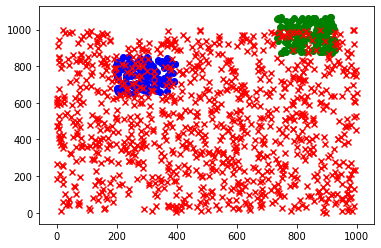

In [22]:
# generamos puntos aleatorios nuevos para clasificarlos
n_test = 1000
tuplas = []
for i in range(n_test):
    tuplas.append([random.randint(0,1000), random.randint(0,1000)])
    
puntos_test = np.matrix(tuplas)
# dibujamos los nuevos puntos junto con los anteriores
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
plt.scatter([puntos_test[:,0]], [puntos_test[:,1]], c='r', marker='x')
display(plt)

In [23]:
# usamos KNN para clasificar los nuevos puntos
k = 12 # número de vecinos

pred_label = []
# clasificamos cada uno de los puntos nuevos
for i in range(puntos_test.shape[0]):
    distances = []
    # por cada punto calculamos la distancia con los puntos de entrenamiento 
    for j in range(puntos.shape[0]):
        dist = np.sqrt(np.sum(np.square(puntos[j] - puntos_test[i])))
        distances.append((dist, labels[j])) # guardamos las etiquetas y la distancia

    # ordenamos por distancia y nos quedamos con los k vecinos más cercanos
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    # contamos los votos para ver qué etiqueta gana
    votes = [0,0]
    for neighbor in neighbors:
        votes[neighbor[1]] = votes[neighbor[1]] + 1
    # obtenemos la etiqueta ganadora
    pred_label.append(votes.index(max(votes)))

## Ahora que hemos clasificados los nuevos puntos los metemos en una matriz simplemente para representarlos en una gráfica, junto con el color definitivo que le corresponde según han sido clasificados por k-nn. 
### De esta forma comprobamos visualmente si la clasificación ha ido según lo esperado.

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

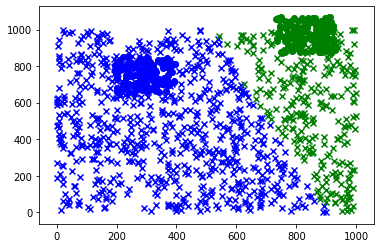

In [24]:
# separar los datos clasificados para dibujarlos
g0 = []
g1 = []
for i in range(len(pred_label)):
    if pred_label[i] == 0:
        g0.append([puntos_test[i,0], puntos_test[i,1]])
    else:
        g1.append([puntos_test[i,0], puntos_test[i,1]])
        
grupo0 = np.matrix(g0)
grupo1 = np.matrix(g1)

# mostrar datos ya clasificados
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
plt.scatter([grupo0[:,0]], [grupo0[:,1]], c='b', marker='x')
plt.scatter([grupo1[:,0]], [grupo1[:,1]], c='g', marker='x')
display(plt)